In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm


# Load data from winequality-red.csv
Data = np.loadtxt('winequality-red.csv', delimiter=';', skiprows=1)
print(Data.shape)
y = Data[:, -1]
X = Data[:, :-1]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


(1599, 12)


In [3]:
svc_clf = SVC(kernel='rbf', C=1.0, random_state=2, degree=3, gamma='auto')
svc_clf.fit(X_train,y_train)
y_pred = svc_clf.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.55


In [4]:
# find the best random states
random_states = np.arange(0, 100, 1)
accuracy = []
states = [] 
for i in tqdm.tqdm(random_states):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    for j in range(1, 100):
        svc_clf = SVC(kernel='rbf', C=1.0, random_state=j, degree=3, gamma='auto')
        svc_clf.fit(X_train,y_train)
        y_pred = svc_clf.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        states.append([i, j])
        

100%|██████████| 100/100 [15:50<00:00,  9.51s/it]


In [1]:
# find the best random state
max_accuracy = max(accuracy)
max_index = accuracy.index(max_accuracy)
best_state = states[max_index]
print('Best random state: ', best_state)
print('Best accuracy: ', max_accuracy)

NameError: name 'accuracy' is not defined

In [5]:
# Standardize the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
svc_clf.fit(X_train_std,y_train)
y_pred = svc_clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.64


Text(0.5, 1.0, 'Correlation between features')

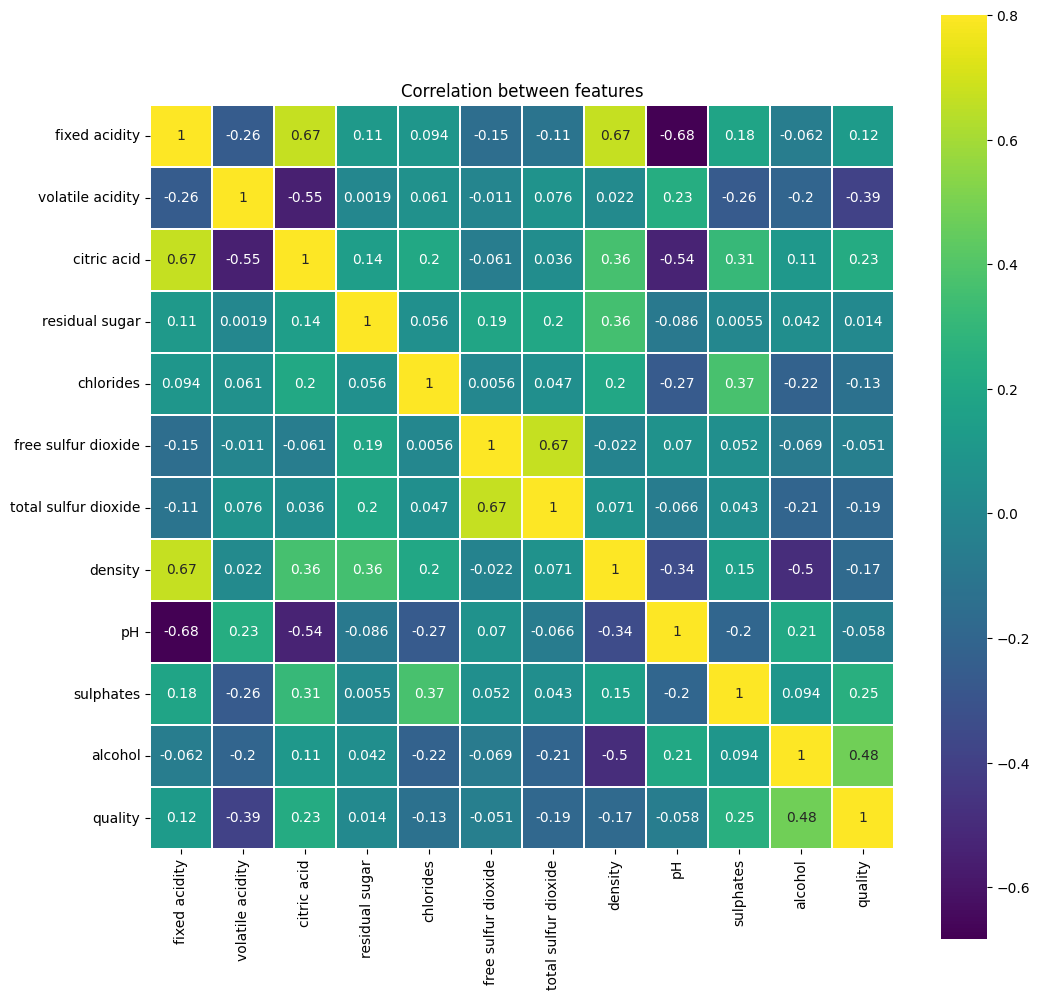

In [6]:
#look at the corellation between the features with quality
dt = pd.read_csv('winequality-red.csv', sep=';')
corr = dt.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features')

In [7]:
# Grid search for best parameters
param_grid = {'C': np.linspace(0.1, 10, 10),
                'gamma': np.linspace(0.1, 1, 10),
                'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train_std, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, grid_predictions))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.585 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.592 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.545 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.607 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.567 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.527 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.583 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.554 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmo

In [8]:
# Grid search for best parameters
param_grid = {'C': np.linspace(1.8, 2.8, 20),
                'gamma': np.linspace(0.6, 0.8, 20),
                'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train_std, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, grid_predictions))

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5] END ......C=1.8, gamma=0.6, kernel=rbf;, score=0.616 total time=   0.0s
[CV 2/5] END ......C=1.8, gamma=0.6, kernel=rbf;, score=0.643 total time=   0.0s
[CV 3/5] END ......C=1.8, gamma=0.6, kernel=rbf;, score=0.634 total time=   0.0s
[CV 4/5] END ......C=1.8, gamma=0.6, kernel=rbf;, score=0.607 total time=   0.0s
[CV 5/5] END ......C=1.8, gamma=0.6, kernel=rbf;, score=0.623 total time=   0.0s
[CV 1/5] END C=1.8, gamma=0.6105263157894737, kernel=rbf;, score=0.616 total time=   0.0s
[CV 2/5] END C=1.8, gamma=0.6105263157894737, kernel=rbf;, score=0.647 total time=   0.0s
[CV 3/5] END C=1.8, gamma=0.6105263157894737, kernel=rbf;, score=0.634 total time=   0.0s
[CV 4/5] END C=1.8, gamma=0.6105263157894737, kernel=rbf;, score=0.612 total time=   0.0s
[CV 5/5] END C=1.8, gamma=0.6105263157894737, kernel=rbf;, score=0.623 total time=   0.0s
[CV 1/5] END C=1.8, gamma=0.6210526315789473, kernel=rbf;, score=0.616 total time